## Principal component analysis (PCA)

É uma redução de dimensionalidade linear que utiliza a Decomposição em Valores Singulares dos dados para projetá-los em um espaço dimensões menor.

Um vetor (não nulo) $\mathbf{v}$ com dimensão $N$ é um \textbf{autovetor} da matriz quadrada $\mathbf{A}$ com dimensões $N \times N$ se satisfaz a equação linear:

$\mathbf{A} \mathbf{v} = \lambda \mathbf{v}$

onde $\lambda$ é um escalar chamado autovalor de $\mathbf{v}$. 

- Os autovetores provocam transformações lineares na matriz $\mathbf{A}$ que alongam ou comprimem os diferentes eixos coordenados.
- A "força" da transformação é quantificada pelo autovalor. 

Também definido como:

$(\mathbf{A} - \lambda_i \mathbf{I}) \mathbf{v} = 0$

Decomposição SVD (singular value decomposition) 

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Singular_value_decomposition_visualisation.svg/800px-Singular_value_decomposition_visualisation.svg.png width="400">

## PCA

O objetivo do PCA é reduzir a dimensão dos dados para um conjunto de variáveis ​​mais gerenciável. 

Vantagens:
- $\textbf{não supervisionado}$
- visualização
- eliminar redundâcia
- evitar dados esparso
- melhorar a classificação
- explorar a relação entre as variáveis

Cada componentes principal é a combinação linear ponderada dos preditores oiginais: 

$Z_i = w_{i1} X_1 + w_{i2} X_2$ para i=1

$Z_i = w_{i1} X_1 + w_{i2} X_2$ para i=2

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

data: [[-1 -1]
 [-2 -1]
 [-3 -2]
 [ 1  1]
 [ 2  1]
 [ 3  2]]
[0.99244289]
[6.30061232]
[[-0.83849224 -0.54491354]]
reduced data [[ 1.38340578]
 [ 2.22189802]
 [ 3.6053038 ]
 [-1.38340578]
 [-2.22189802]
 [-3.6053038 ]]


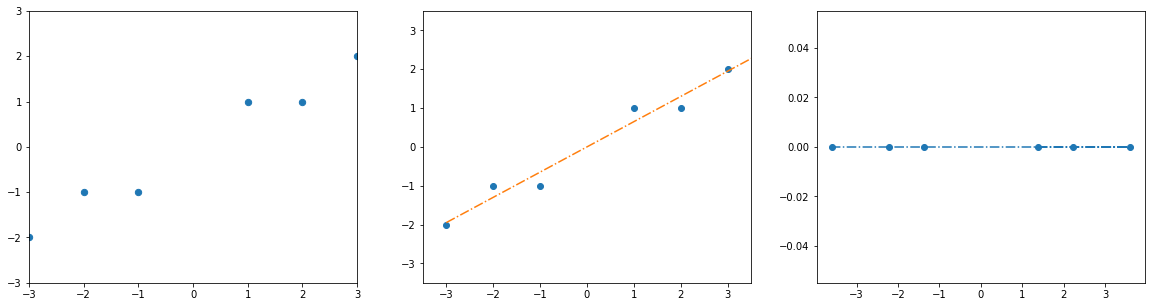

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
print('data:',X)

fig = plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(X[:,0],X[:,1],s=40)
plt.xlim([-3,3])
plt.ylim([-3,3])


pca = PCA(n_components=1)
pca.fit(X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

# formato
#   linhas: componentes
#   colunas: variaveis
print(pca.components_)

delta_1 = pca.components_[0,1]/pca.components_[0,0]

x = np.arange(-3,5)
y = np.arange(-3,5)

plt.subplot(1,3,2)
plt.plot(X[:,0],X[:,1],'o')
plt.plot(x,delta_1*y,'-.')
plt.xlim([-3.5,3.5])
plt.ylim([-3.5,3.5])


X_t = pca.transform(X)
print('reduced data',X_t)

plt.subplot(1,3,3)
plt.plot(X_t,np.zeros((6)),'-.o')
plt.show()

### Efeito de uma feature sem variânça

$Z_i = w_{i1} X_1 + w_{i2} X_2 + w_{i3} X_3$

$Z_i = w_{i1} X_1 + w_{i2} X_2 + w_{i3} X_3$

In [3]:
# X = 
# print('data:',X)


# fig = plt.figure(figsize=(10,10))
# ax = plt.axes(projection="3d")
# ax.scatter3D(X[:,0],X[:,1],X[:,2], c='blue', s=40, depthshade=False);
# plt.xlim([-3,3])
# plt.ylim([-3,3])
# plt.show()

# pca = PCA(n_components=2)
# pca.fit(X)

# print(pca.explained_variance_ratio_)

# # formato
# #   linhas: componentes
# #   colunas: variaveis
# print(pca.components_)

# delta_1 = pca.components_[0,1]/pca.components_[0,0]
# delta_2 = pca.components_[1,1]/pca.components_[1,0]

# x = np.arange(-3,5)
# y = np.arange(-3,5)

# fig = plt.figure(figsize=(11,5))
# plt.subplot(1,2,1)
# plt.plot(X[:,0],X[:,1],'o')
# plt.plot(x,delta_1*y,'-.')
# plt.plot(x,delta_2*y,'-.')
# plt.xlim([-4,4])
# plt.ylim([-4,4])

# X_t = pca.transform(X)
# print('reduced data',X_t)

# plt.subplot(1,2,2)
# plt.plot(X_t[:,0],X_t[:,1],'o')
# plt.show()

## Vamos trabalhar (explorar) o dataset 'wine'

Abstract: Using chemical analysis determine the origin of wines
	
https://archive.ics.uci.edu/ml/datasets/wine

The attributes are:
- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline



In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

wine = datasets.load_wine()
X = wine.data
label = wine.target

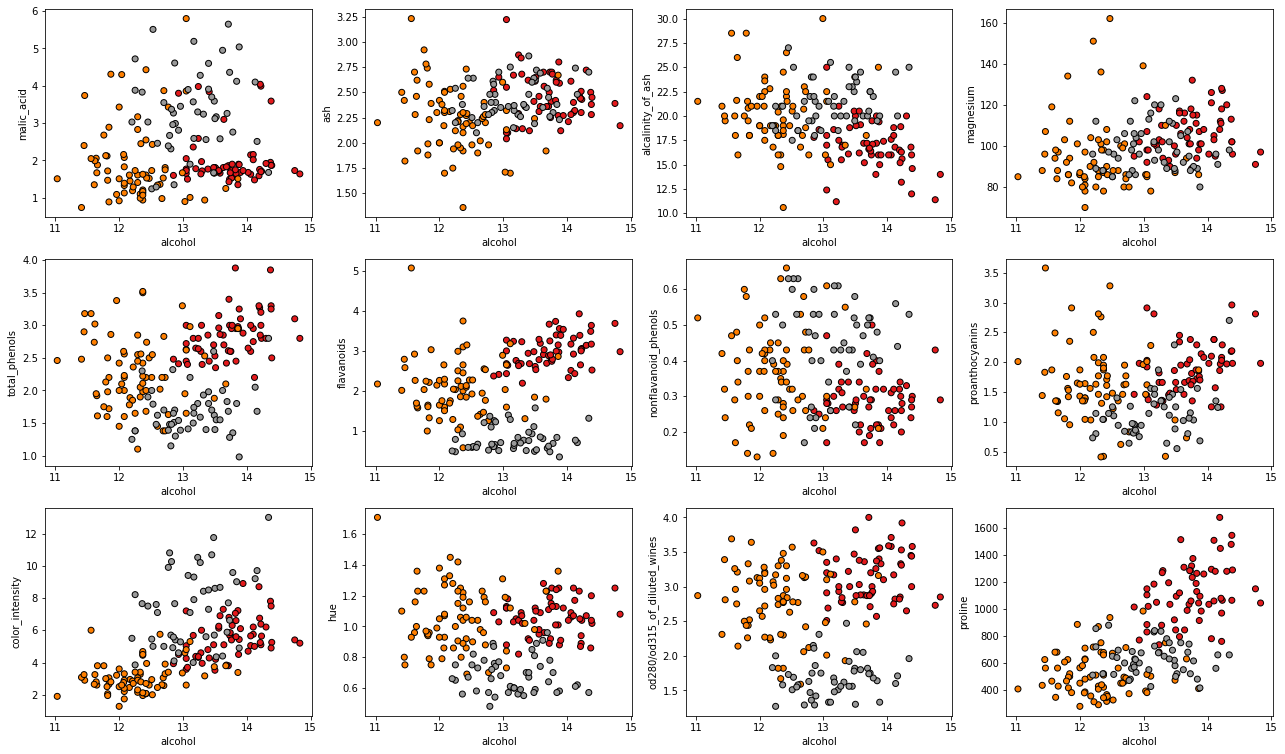

In [3]:
plt.figure(figsize=(22, 13))
for i in range(1,X.shape[1]):
  plt.subplot(3,4,i)
  plt.scatter(X[:, 0], X[:, i], c=label, cmap=plt.cm.Set1, edgecolor='k')
  plt.xlabel(wine.feature_names[0])
  plt.ylabel(wine.feature_names[i])

plt.show()

In [ ]:
# # To getter a better understanding of interaction of the dimensions
# # plot the first three PCA dimensions
# fig = plt.figure(figsize=(12,12))
# ax = plt.axes(projection="3d")
# ax.scatter3D(X[:,0],X[:,1],X[:,2], c=label, s=40, depthshade=False);
# ax.set_xlabel(wine.feature_names[0])
# ax.set_ylabel(wine.feature_names[1])
# ax.set_zlabel(wine.feature_names[2])
# plt.show()

In [ ]:
# Fit to data and predict using pipelined GNB and PCA.
# n_components = 3
# pca = PCA(n_components=n_components)
# pca.fit(X)
# X_t = pca.transform(X)

# print(pca.explained_variance_ratio_)

# # formato
# #   linhas: componentes
# #   colunas: variaveis
# # print(pca.components_.shape)
# names = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 
#        'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'diluted_wines', 'proline']

# plt.figure(figsize=(20,20))
# for i in range(n_components):
#   plt.subplot(n_components,1,i+1)
#   plt.bar(np.arange(13),pca.components_[i,:])
#   plt.hlines(0,-0.5, 12.5)
#   plt.xlim([-0.5, 12.5])
#   plt.ylabel('componente_'+str(i+1))
#   plt.xticks(np.arange(13),names,rotation=30)

## Efeito da normalização

"Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. $\textbf{The input data is centered but not scaled}$ for each feature before applying the SVD."

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.naive_bayes import GaussianNB
# from sklearn import metrics

# # Make a train/test split using 30% test size
# X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.30, random_state=42)

# # Fit to data and predict using pipelined GNB and PCA.
# pca = PCA(n_components=2)
# pca.fit(X_train)
# X_train_pca = pca.transform(X_train)

# clf = GaussianNB()
# clf.fit(X_train_pca, y_train)
# pred_test = clf.predict(pca.transform(X_test))

# # Show prediction accuracies in scaled and unscaled data.
# print('\n accuracy com duas compnentes')
# print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

# ########################
# # agora com scaler

# std = StandardScaler()
# std.fit(X_train)
# X_train_std = std.transform(X_train)

# pca = PCA(n_components=2)
# pca.fit(X_train_std)
# X_train_std_pca = pca.transform(X_train_std)

# clf = GaussianNB()
# clf.fit(X_train_std_pca, y_train)
# pred_test = clf.predict(pca.transform(std.transform(X_test)))

# # Show prediction accuracies in scaled and unscaled data.
# print('\n accuracy com duas compnentes mais normalizacao')
# print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

In [ ]:
# plt.figure(figsize=(20, 5))
# plt.subplot(1,2,1)
# plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k')
# plt.xlabel('PCA_1')
# plt.ylabel('PCA_2')
# plt.subplot(1,2,2)
# plt.scatter(X_train_std_pca[:, 0], X_train_std_pca[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k')
# plt.xlabel('PCA_1')
# plt.ylabel('PCA_2')
# plt.show()

## Efeito do número de componentes

In [ ]:
# acc = []

# for i in range(1,14):
#   pca = PCA(n_components=i)
#   pca.fit(X_train)
#   X_train_pca = pca.transform(X_train)

#   clf = GaussianNB()
#   clf.fit(X_train_pca, y_train)
#   pred_test = clf.predict(pca.transform(X_test))
#   acc.append(clf.score(pca.transform(X_test), y_test))

# plt.figure(figsize=(22,5))
# plt.subplot(1,2,1)
# plt.plot(acc,'-o')
# plt.subplot(1,2,2)
# plt.plot(pca.explained_variance_ratio_,'-.*')
# plt.ylim([0,0.003])
# plt.show()

## Linear Discriminant Analysis For Dimensionality Reduction

A Análise Discriminante Linear procura separar (ou discriminar) as amostras no conjunto de dados de treinamento pelo valor das classes. 

Especificamente, o modelo procura encontrar uma combinação linear de variáveis de entrada que consiga a separação máxima das amostras entre as classes (centróides ou médias de classe) e a separação mínima de amostras dentro de cada classe.

LDA possui as mesmas vantagens do PCA mas é supervisionado! Consequentemente, a separação torna-se melhor. 

O objetivo do LDA é maximizar 
$S = \frac{\sigma^2_{between}}{\sigma^2_{within}}$

Objetivo multiclasse:

$S = \frac{\mathbf{w}^T \Sigma_b \mathbf{w}}{\mathbf{w}^T \Sigma \mathbf{w}}$

onde $\mathbf{w}$ é um autovetor de $ \Sigma^{-1} \Sigma_b$



In [ ]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# n_components = 2
# pca = PCA(n_components=n_components)
# lda = LinearDiscriminantAnalysis(n_components=n_components)

# X_pca = pca.fit(X).transform(X)
# X_lda = lda.fit(X, label).transform(X)

In [ ]:
# plt.figure(figsize=(20, 5))
# plt.subplot(1,2,1)
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=label, cmap=plt.cm.Set1, edgecolor='k')
# plt.xlabel('PCA_1')
# plt.ylabel('PCA_2')
# plt.title('PCA')

# plt.subplot(1,2,2)
# plt.scatter(X_lda[:, 0], X_lda[:, 1], c=label, cmap=plt.cm.Set1, edgecolor='k')
# plt.xlabel('LDA_1')
# plt.ylabel('LDA_2')
# plt.title('LDA')
# plt.show()

### Calssificação com LDA

In [ ]:
# # Make a train/test split using 30% test size
# X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.30, random_state=42)

# # Fit to data and predict using pipelined GNB and LDA.
# lda = LinearDiscriminantAnalysis(n_components=n_components)
# X_train_lda = lda.fit(X_train, y_train).transform(X_train)


# clf = GaussianNB()
# clf.fit(X_train_lda, y_train)
# pred_test = clf.predict(lda.transform(X_test))

# # Show prediction accuracies in scaled and unscaled data.
# print('\n accuracy com duas compnentes')
# print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))